explained variance ratio (first two components): [0.92461872 0.05306648]


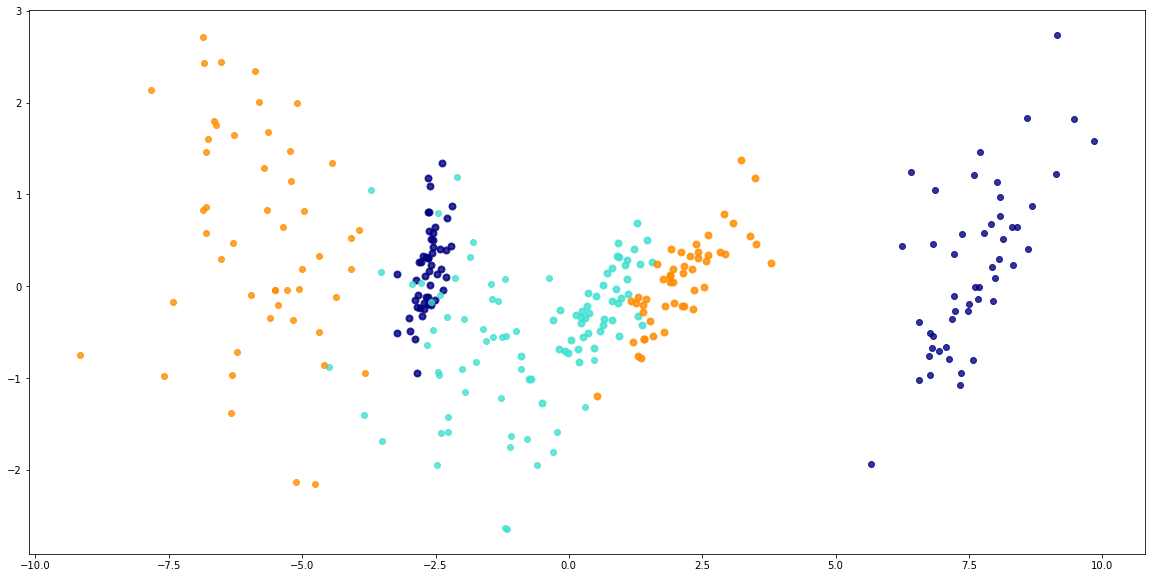

In [87]:

# Principal Component Analysis helps us deal with high dimensional data.  Given a collection of points in two, three, or higher dimensional space, a "best fitting" line can be defined as one that minimizes the average squared distance from a point to the line.  The next best-fitting line can be similarly chosen from directions perpendicular to the first.  Repeating this process yields an orthogonal basis in which different individual dimensions of the data are uncorrelated.  These basis vectors are called principal components

# Linear Discriminant Analysis is a method used in statistics, pattern recognition, and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification. 

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))


from matplotlib import pyplot as plt
#import figure

#figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
 
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)


Class labels [1 2 3]


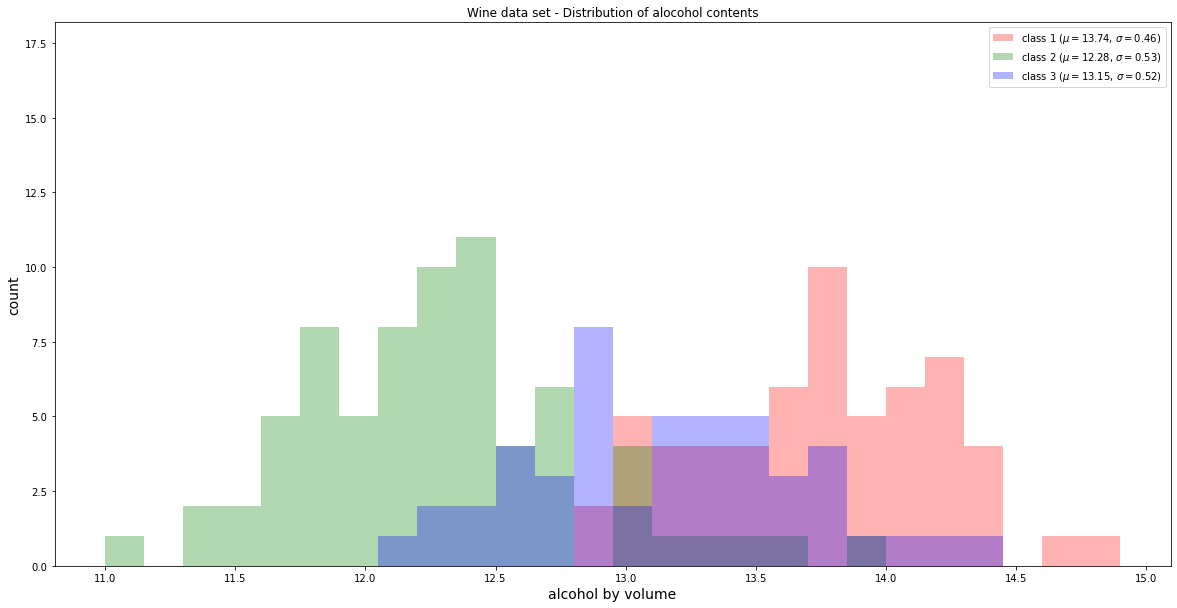

In [88]:

import pandas as pd
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']


print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

from math import floor, ceil 

# the order of the colors for each histogram
colors = ('red', 'green', 'blue')

# bin width of the histogram in steps of 0.15
bins = np.arange(floor(min(X[:,0])), ceil(max(X[:,0])), 0.15)

# max count for a particular bin for all classes combined
max_bin = max(np.histogram(X[:,0], bins=bins)[0])

for label,color in zip(range(1,4), colors):
    mean = np.mean(X[:,0][y == label]) # class sample mean
    stdev = np.std(X[:,0][y == label]) # class standard deviation
    plt.hist(X[:,0][y == label], bins=bins, alpha=0.3, # opacity level
             label='class {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev),
             color=color)

plt.ylim([0, max_bin*1.3])
plt.title('Wine data set - Distribution of alocohol contents')
plt.xlabel('alcohol by volume', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()


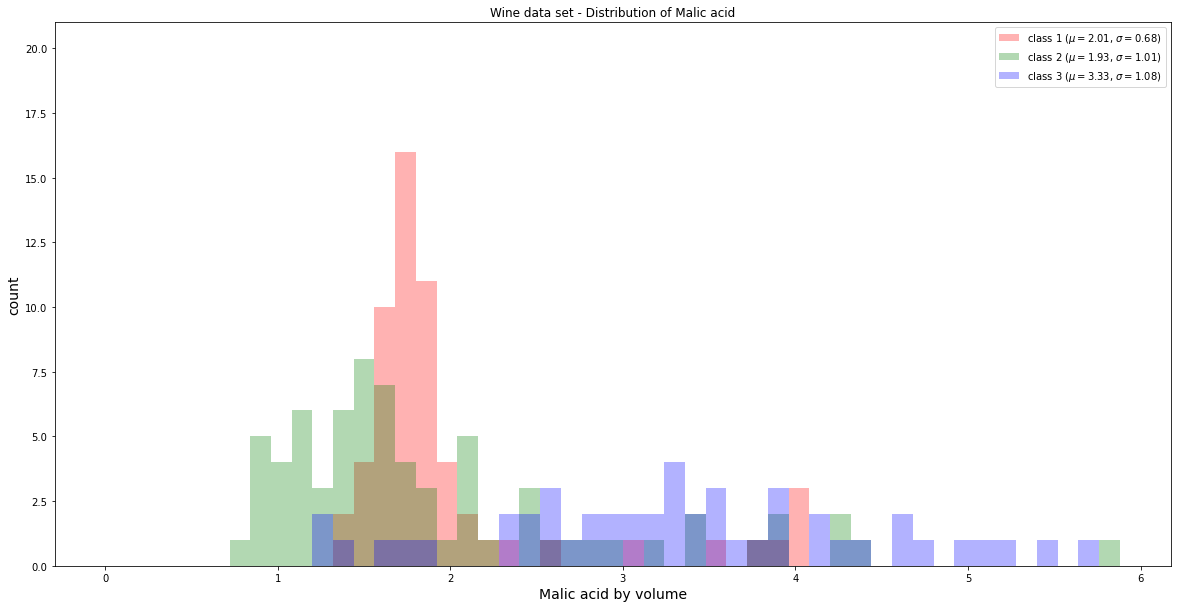

In [89]:

from math import floor, ceil 

# the order of the colors for each histogram
colors = ('red', 'green', 'blue')

# bin width of the histogram in steps of 0.12
bins = np.arange(floor(min(X[:,1])), ceil(max(X[:,1])), 0.12)

# max count for a particular bin for all classes combined
max_bin = max(np.histogram(X[:,1], bins=bins)[0])

for label,color in zip(range(1,4), colors):
    mean = np.mean(X[:,1][y == label]) # class sample mean
    stdev = np.std(X[:,1][y == label]) # class standard deviation
    plt.hist(X[:,1][y == label], bins=bins, alpha=0.3, # opacity level
             label='class {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev),
             color=color)

plt.ylim([0, max_bin])
plt.title('Wine data set - Distribution of Malic acid')
plt.xlabel('Malic acid by volume', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()


In [90]:

np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))
    
X_train_std

d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices


print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

print('Class label distribution: %s' % np.bincount(y_train)[1:])


MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]

Within-class scatter matrix: 13x13
Class label distribution: [40 49 35]


Scaled within-class scatter matrix: 13x13
Between-class scatter matrix: 13x13
Eigenvalues in decreasing order:

452.72158124497435
156.43636121952315
4.5686883754394227e-14
4.210610514189544e-14
2.7065303850862537e-14
2.5241240370677077e-14
2.5241240370677077e-14
2.415823477511646e-14
1.4686269415127665e-14
1.4686269415127665e-14
3.906707997081312e-15
9.973000409386861e-16
0.0


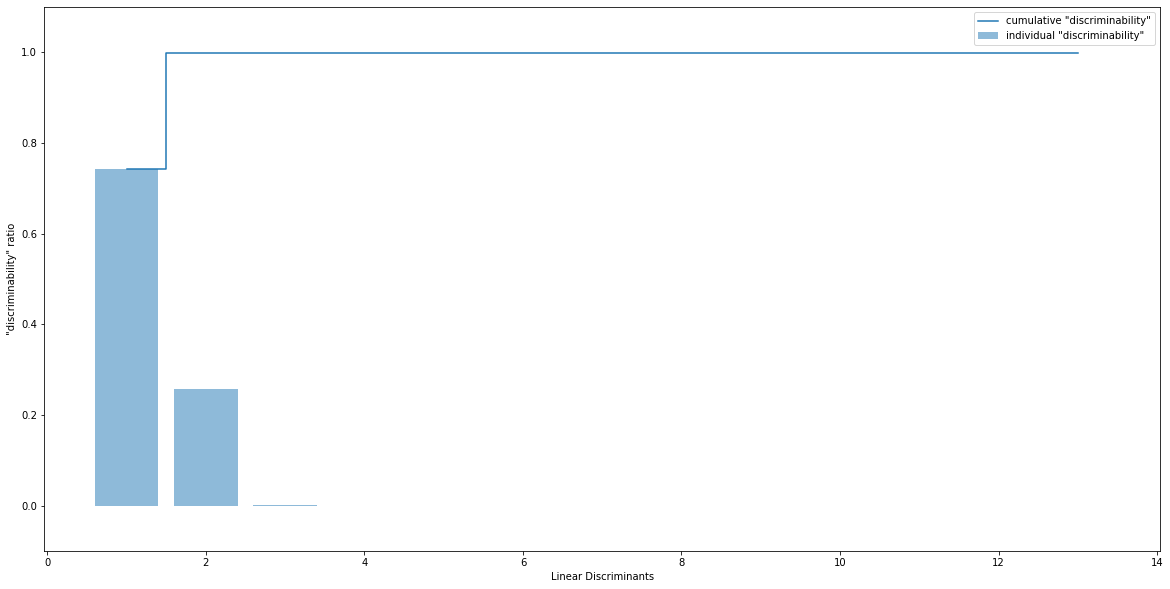

In [92]:

d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))

mean_overall = np.mean(X_train_std, axis=0)
d = 13  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_vals.shape, eigen_vecs.shape
eigen_vals


eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

    
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center', label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid', label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()


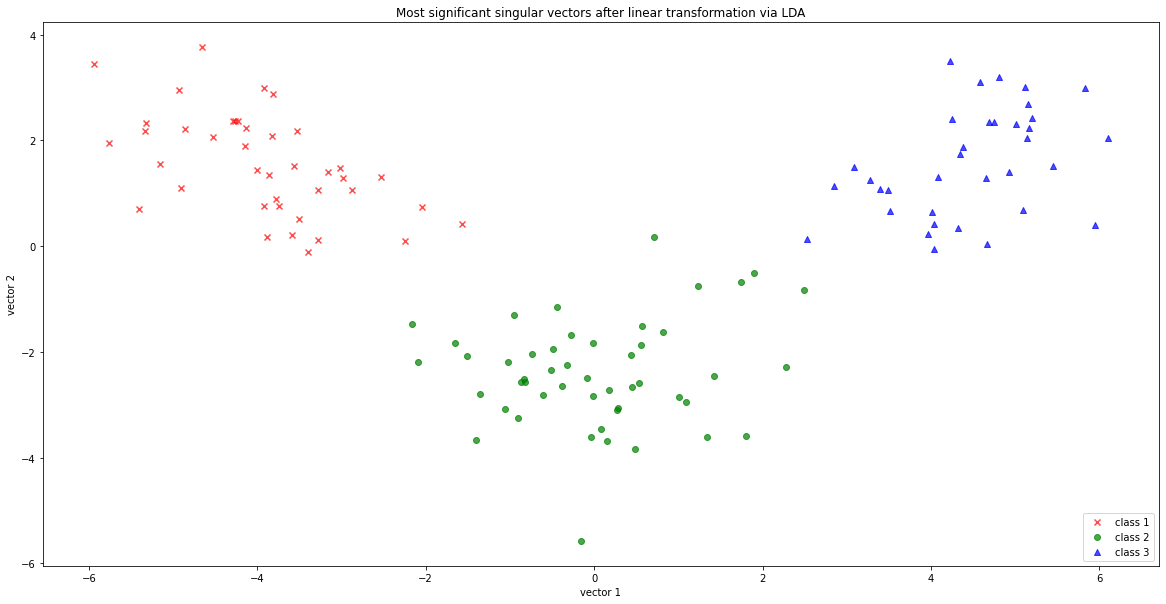

In [93]:

w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, 
               eigen_pairs[1][1][:, np.newaxis].real))
w
    
X_train_lda = X_train_std.dot(w)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sklearn_lda = LinearDiscriminantAnalysis(n_components=2)
transf_lda = sklearn_lda.fit_transform(X_train, y_train)

for label,marker,color in zip(range(1,4),('x', 'o', '^'),('red', 'green', 'blue')):
    plt.scatter(x=transf_lda[:,0][y_train == label],
                y=transf_lda[:,1][y_train == label],
                marker=marker, color=color,
                alpha=0.7, label='class {}'.format(label))

plt.xlabel('vector 1')
plt.ylabel('vector 2')

plt.legend(loc='lower right')
plt.title('Most significant singular vectors after linear transformation via LDA')

plt.show()


In [94]:

# Let's do some analysis using the PCA methodology.
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# As mentioned earlier, PCA performs best with a normalized feature set. We will perform standard scalar normalization to normalize our feature set. To do this, execute the following code:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))


[[11  3  0]
 [ 4 11  1]
 [ 0  0  6]]
Accuracy 0.7777777777777778


In [95]:

# Feature Scaling
# As was the case with PCA, we need to perform feature scaling for LDA too. Execute the following script to do so:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))


[[11  3  0]
 [ 4 11  1]
 [ 0  0  6]]
Accuracy 0.7777777777777778


In [99]:

# Support Vector Machines are representations of points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible.  New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall. 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Create classifier object
from sklearn.svm import SVC
classifier_svm_kernel = SVC(C=5.0,kernel='rbf', gamma=0.12,tol=0.00001)
classifier_svm_kernel.fit(X_train,y_train)

#Predict the result for test values
y_pred = classifier_svm_kernel.predict(X_test)

#Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))


[[11  0  0]
 [ 0 16  0]
 [ 0  1  8]]
Accuracy 0.9722222222222222
